### 최종 전처리 항목 모델링
- scale_final.csv
- scaler 사용
- 성적이 안 오르면 제거된 데이터 하나씩 복구

In [1]:
# 전처리 과정 가져오기
import pandas as pd

data = pd.read_csv('../DATA/scale_final.csv')
data.head()

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
0,8,69.6,67.2,3.01,67.1,-9,3
1,8,69.8,67.2,3.01,67.0,-9,3
2,8,69.7,67.9,3.08,65.9,-9,3
3,8,69.7,67.8,3.08,65.9,-9,3
4,8,69.7,67.8,3.08,65.9,-9,3


1. Scaler 없이

In [2]:
# Multiple Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# 데이터 분할
X = data.drop('scale_pv', axis=1)
y = data['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Multiple Linear Regression')
print(f'coef : {model.coef_}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Random Forest')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('LightGBM')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

Multiple Linear Regression
coef : [ 0.00940639 -0.00304878  0.00679727 -0.00077587  0.00016171 -0.00145634]
MAE: 0.0273
MAPE: 0.0090
MSE: 0.0016
RMSE: 0.0403
R2 Score: 0.0440

Random Forest
MAE: 0.0180
MAPE: 0.0059
MSE: 0.0008
RMSE: 0.0279
R2 Score: 0.5406

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 22480, number of used features: 6
[LightGBM] [Info] Start training from score 3.041669
LightGBM
MAE: 0.0236
MAPE: 0.0078
MSE: 0.0011
RMSE: 0.0338
R2 Score: 0.3254


2. Scaler 사용

In [3]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 데이터 분할
X = data_scaled.drop('scale_pv', axis=1)
y = data_scaled['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Multiple Linear Regression')
print(f'coef : {model.coef_}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Random Forest')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('LightGBM')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

Multiple Linear Regression
coef : [ 0.0101144  -0.01016259  0.03946804 -0.00500562  0.03216844 -0.00939574]
MAE: 0.0294
MAPE: 0.0578
MSE: 0.0019
RMSE: 0.0433
R2 Score: 0.0440

Random Forest
MAE: 0.0193
MAPE: 0.0376
MSE: 0.0009
RMSE: 0.0297
R2 Score: 0.5497

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 22480, number of used features: 6
[LightGBM] [Info] Start training from score 0.517924
LightGBM
MAE: 0.0254
MAPE: 0.0497
MSE: 0.0013
RMSE: 0.0364
R2 Score: 0.3254


3. 평균에서 움직이므로 StandardScaler 사용

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 데이터 분할
X = data_scaled.drop('scale_pv', axis=1)
y = data_scaled['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Multiple Linear Regression')
print(f'coef : {model.coef_}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Random Forest')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('LightGBM')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

Multiple Linear Regression
coef : [ 0.03046822 -0.03423144  0.14908841 -0.0209167   0.05412258 -0.05463139]
MAE: 0.6539
MAPE: 1.1367
MSE: 0.9309
RMSE: 0.9648
R2 Score: 0.0440

Random Forest
MAE: 0.4286
MAPE: 1.3703
MSE: 0.4394
RMSE: 0.6629
R2 Score: 0.5488

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 22480, number of used features: 6
[LightGBM] [Info] Start training from score -0.007115
LightGBM
MAE: 0.5661
MAPE: 1.2688
MSE: 0.6569
RMSE: 0.8105
R2 Score: 0.3254


In [5]:
# 단순히 normalization
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 데이터 분할
X = data_scaled.drop('scale_pv', axis=1)
y = data_scaled['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Multiple Linear Regression')
print(f'coef : {model.coef_}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Random Forest')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('LightGBM')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

Multiple Linear Regression
coef : [ 4.68547973e-02  2.72079311e-02  7.62536252e-03  6.11223146e-04
  2.55797441e-05 -1.60353416e-03]
MAE: 0.0003
MAPE: 0.0100
MSE: 0.0000
RMSE: 0.0004
R2 Score: 0.5763

Random Forest
MAE: 0.0002
MAPE: 0.0064
MSE: 0.0000
RMSE: 0.0003
R2 Score: 0.7942

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 22480, number of used features: 6
[LightGBM] [Info] Start training from score 0.025376
LightGBM
MAE: 0.0002
MAPE: 0.0080
MSE: 0.0000
RMSE: 0.0003
R2 Score: 0.7020


In [6]:
# ???
data_scaled.head(10)

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
0,0.067551,0.587693,0.567428,0.025416,0.566583,-0.075995,0.025332
1,0.067516,0.589078,0.567135,0.025403,0.565447,-0.075956,0.025319
2,0.067673,0.589603,0.574377,0.026054,0.557459,-0.076132,0.025377
3,0.067706,0.589890,0.573810,0.026067,0.557730,-0.076169,0.025390
4,0.067706,0.589890,0.573810,0.026067,0.557730,-0.076169,0.025390
5,0.067871,0.591325,0.571812,0.025536,0.558238,-0.076355,0.025452
6,0.067773,0.591316,0.570984,0.025499,0.559124,-0.076244,0.025415
7,0.067320,0.587371,0.561284,0.025413,0.573065,-0.075736,0.025245
8,0.067320,0.588210,0.562123,0.025413,0.571380,-0.075735,0.025245
9,0.067611,0.589060,0.573002,0.025692,0.559480,-0.076062,0.025354


In [7]:
data.head(10)

# 아 normalizer는 각 행을 기준으로 정규화를 진행하는 것이기 때문에, 각 행의 값이 1로 변환되어있음
# - 열 기준 정규화를 진행하고 싶다면 MinMaxScaler를 사용해야함

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
0,8,69.6,67.2,3.01,67.1,-9,3
1,8,69.8,67.2,3.01,67.0,-9,3
2,8,69.7,67.9,3.08,65.9,-9,3
3,8,69.7,67.8,3.08,65.9,-9,3
4,8,69.7,67.8,3.08,65.9,-9,3
5,8,69.7,67.4,3.01,65.8,-9,3
6,8,69.8,67.4,3.01,66.0,-9,3
7,8,69.8,66.7,3.02,68.1,-9,3
8,8,69.9,66.8,3.02,67.9,-9,3
9,8,69.7,67.8,3.04,66.2,-9,3


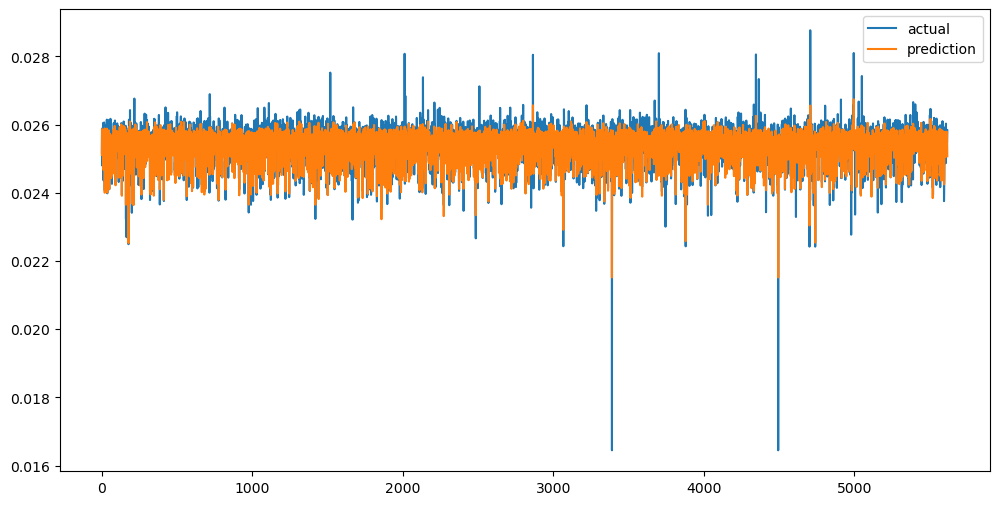

In [8]:
# 예측값과 실제값 비교
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()      # 이게 좋은 건지 모르겠다...

5. 이참에 RobustScaler도 사용

In [9]:
# Scaling
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 데이터 분할
X = data_scaled.drop('scale_pv', axis=1)
y = data_scaled['scale_pv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Multiple Linear Regression')
print(f'coef : {model.coef_}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('Random Forest')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
print()

# LightGBM
from lightgbm import LGBMRegressor

# 모델 학습
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 평가
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('LightGBM')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

Multiple Linear Regression
coef : [ 0.2351598  -0.04573164  0.15293866 -0.03491419  0.06064185 -0.10922546]
MAE: 0.6827
MAPE: 62957052648449.9375
MSE: 1.0148
RMSE: 1.0074
R2 Score: 0.0440

Random Forest
MAE: 0.4494
MAPE: 158361410487136.2812
MSE: 0.4804
RMSE: 0.6931
R2 Score: 0.5475

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 22480, number of used features: 6
[LightGBM] [Info] Start training from score 0.041726
LightGBM
MAE: 0.5911
MAPE: 110001817389071.1719
MSE: 0.7161
RMSE: 0.8462
R2 Score: 0.3254


### 원본 데이터로 평가

In [10]:
# Load Data
original = pd.read_csv('../DATA/바웰공정데이터.csv')
original.head()

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70


In [ ]:
# Evaluation
